--2021-03-13 18:41:28--  https://pbs.twimg.com/media/DhNIYqEWkAIK3vm.jpg:large
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.173.16
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.173.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384033 (375K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 375.03K  --.-KB/s    in 0.06s   

2021-03-13 18:41:29 (5.89 MB/s) - ‘image.jpg’ saved [384033/384033]



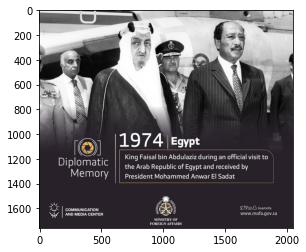

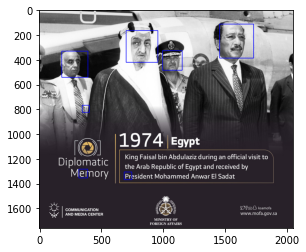

In [7]:
!wget -O image.jpg https://pbs.twimg.com/media/DhNIYqEWkAIK3vm.jpg:large

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Or download it from Github: https://github.com/opencv/opencv/tree/master/data/haarcascades  

# Read image
img = cv2.imread("image.jpg")
original_img = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detects rectangular objects of different sizes
# (1.1) scale factor: how much the image size is reduced at each scale (higher means faster)
# (4) is the 
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y , w ,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0 , 0), 3)

# Display the output
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))